In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Problem 1


A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).


### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [2]:
# importing dataset for problem statement 1 
wc = pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
wc.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


Measure of central tendency
- Mean
- Median 
- Mode
can be acquired by using the describe function for every parameter

### 1.1.1 Descriptive statistics to summarize data.

In [4]:
wc.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 1.1.2 & 1.1.3 Region and channel with by more spending

In [5]:
wccopy = wc.copy()

In [6]:
wccopy['Spending'] = wccopy.Fresh + wccopy.Milk + wccopy.Grocery + wccopy.Frozen + wccopy.Detergents_Paper +wccopy.Delicatessen
wccopy.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [7]:
region = pd.pivot_table(wccopy,columns='Region', values='Spending',aggfunc='sum')
region

Region,Lisbon,Oporto,Other
Spending,2386813,1555088,10677599


In [8]:
channel = pd.pivot_table(wccopy,columns='Channel', values='Spending',aggfunc='sum')
channel

Channel,Hotel,Retail
Spending,7999569,6619931


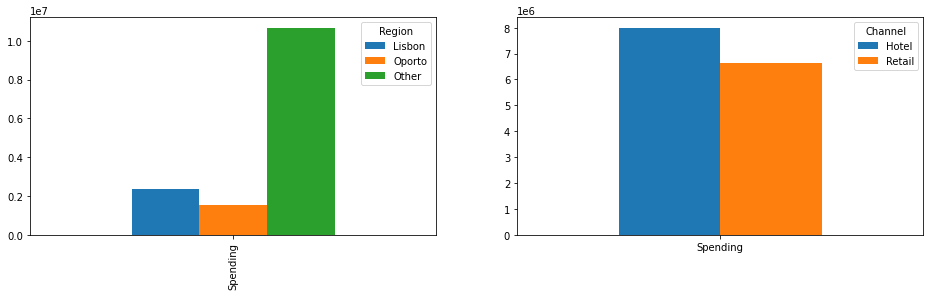

In [9]:
fig, axs = plt.subplots(1,2,figsize = (16,4))
region.plot.bar(ax=axs[0]);
channel.plot.bar(ax=axs[1]);
plt.xticks(rotation=0);

- ##### Other region seems to be spending the most with 10677599 and hotel channel seems to be spending the most with 7999569

- ##### Oporto region seems to be spending the least with 1555088 and retail channels seems to be spenfing the least with 6619931

### 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer 

#####  Fresh variety

In [10]:
pd.pivot_table(wccopy,index='Region',values='Fresh',columns='Channel',aggfunc=sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,761233,93600,854833
Oporto,326215,138506,464721
Other,2928269,1032308,3960577
All,4015717,1264414,5280131


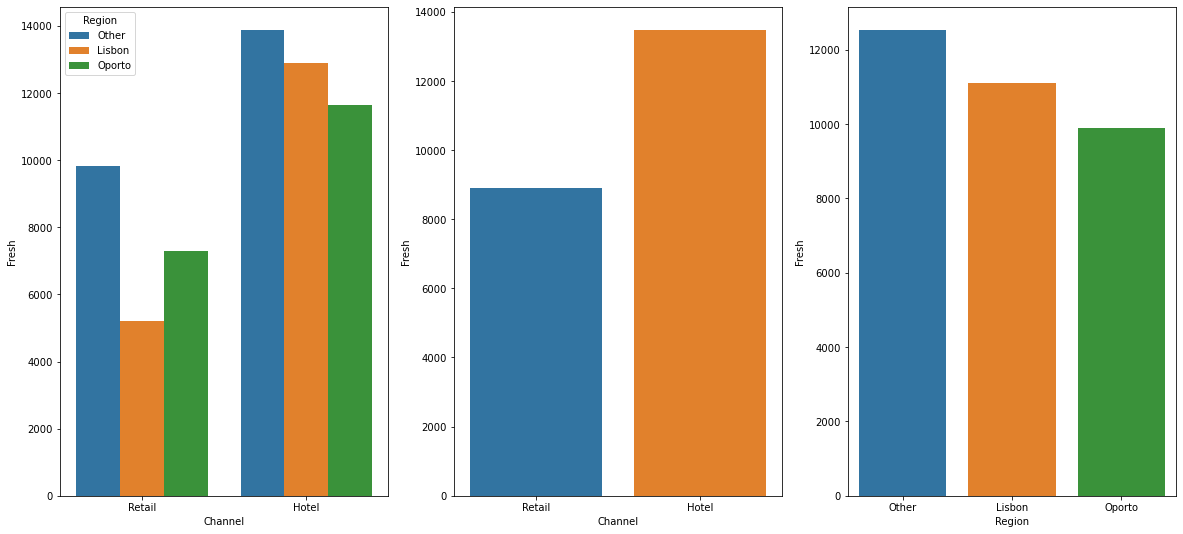

In [11]:
fig, axs = plt.subplots(1,3,figsize = (20,9))
sns.barplot(x="Channel", y="Fresh", hue ="Region", ci=None, data=wccopy,ax=axs[0] );
sns.barplot(x="Channel", y="Fresh",data=wccopy,ci=None,ax=axs[1]);
sns.barplot(x="Region", y="Fresh", ci=None, data=wccopy,ax=axs[2]);

##### Milk variety

In [12]:
pd.pivot_table(wccopy,index='Region',values='Milk',columns='Channel',aggfunc=sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,228342,194112,422454
Oporto,64519,174625,239144
Other,735753,1153006,1888759
All,1028614,1521743,2550357


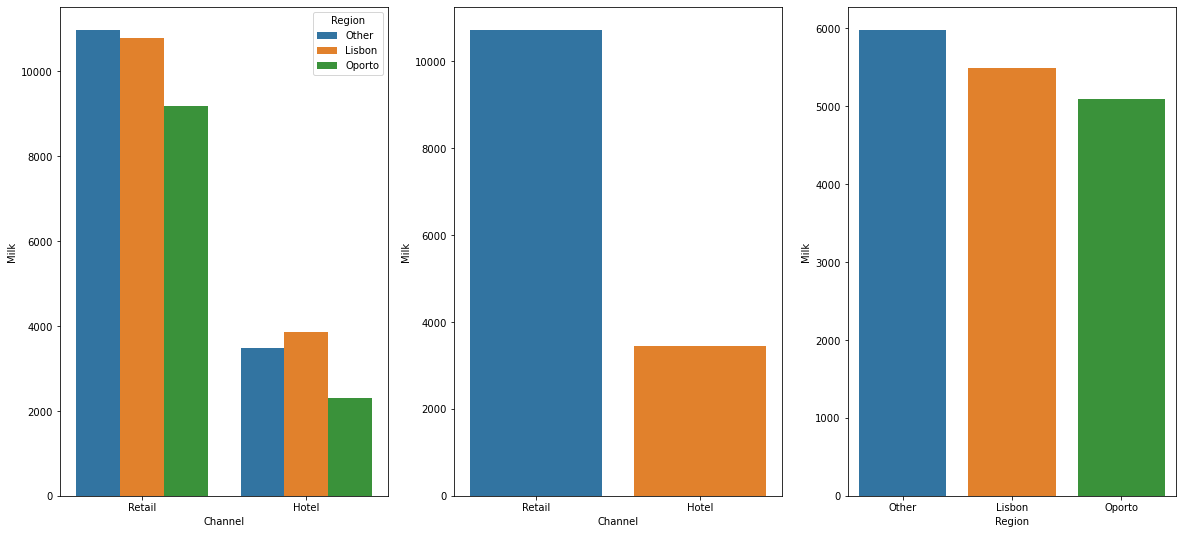

In [13]:
fig, axs = plt.subplots(1,3,figsize = (20,9))
sns.barplot(x="Channel", y="Milk", hue ="Region", ci=None, data=wccopy,ax=axs[0] );
sns.barplot(x="Channel", y="Milk",data=wccopy,ci=None,ax=axs[1]);
sns.barplot(x="Region", y="Milk", ci=None, data=wccopy,ax=axs[2]);

#### Grocery variety

In [14]:
pd.pivot_table(wccopy,index='Region',values='Grocery',columns='Channel',aggfunc=sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,237542,332495,570037
Oporto,123074,310200,433274
Other,820101,1675150,2495251
All,1180717,2317845,3498562


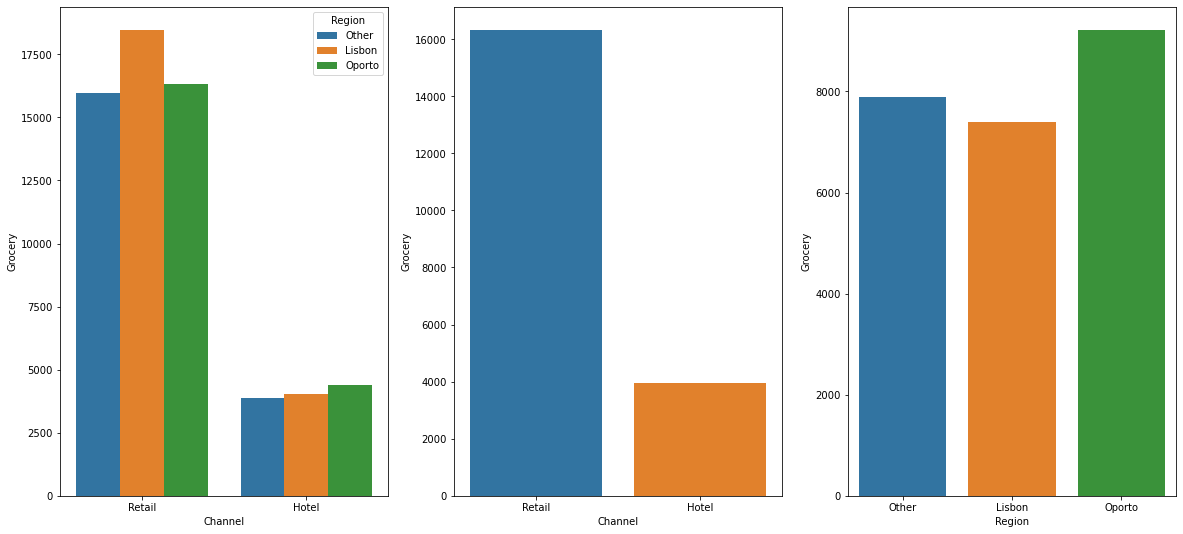

In [15]:
fig, axs = plt.subplots(1,3,figsize = (20,9))
sns.barplot(x="Channel", y="Grocery", hue ="Region", ci=None, data=wccopy,ax=axs[0] );
sns.barplot(x="Channel", y="Grocery",data=wccopy,ci=None,ax=axs[1]);
sns.barplot(x="Region", y="Grocery", ci=None, data=wccopy,ax=axs[2]);

#### Frozen variety

In [16]:
pd.pivot_table(wccopy,index='Region',values='Frozen',columns='Channel',aggfunc=sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,184512,46514,231026
Oporto,160861,29271,190132
Other,771606,158886,930492
All,1116979,234671,1351650


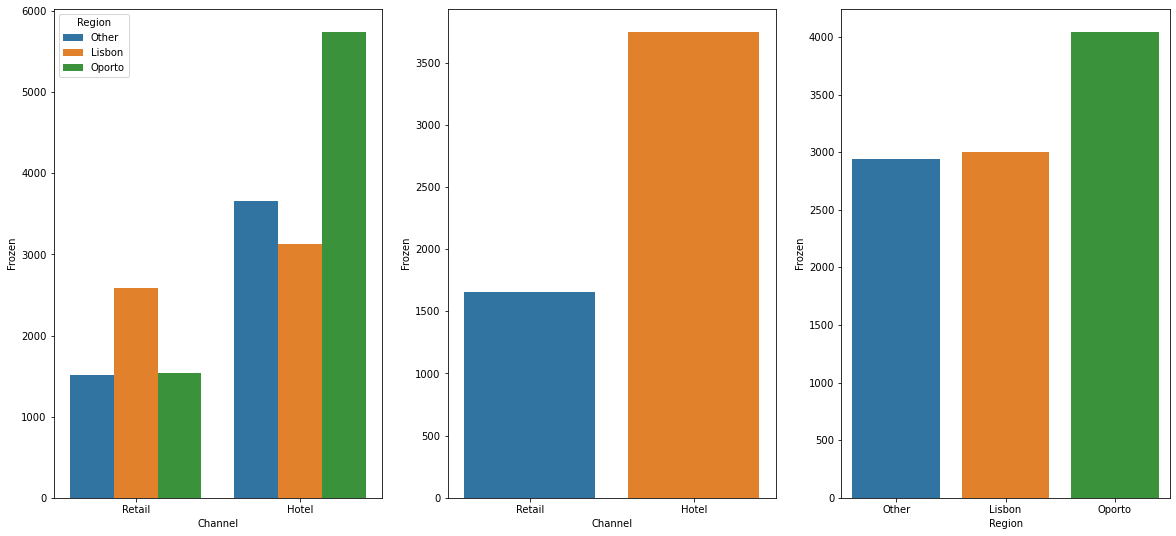

In [17]:
fig, axs = plt.subplots(1,3,figsize = (20,9))
sns.barplot(x="Channel", y="Frozen", hue ="Region", ci=None, data=wccopy,ax=axs[0] );
sns.barplot(x="Channel", y="Frozen",data=wccopy,ci=None,ax=axs[1]);
sns.barplot(x="Region", y="Frozen", ci=None, data=wccopy,ax=axs[2]);

#### Detergents_Paper variety

In [18]:
pd.pivot_table(wccopy,index='Region',values='Detergents_Paper',columns='Channel',aggfunc=sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,56081,148055,204136
Oporto,13516,159795,173311
Other,165990,724420,890410
All,235587,1032270,1267857


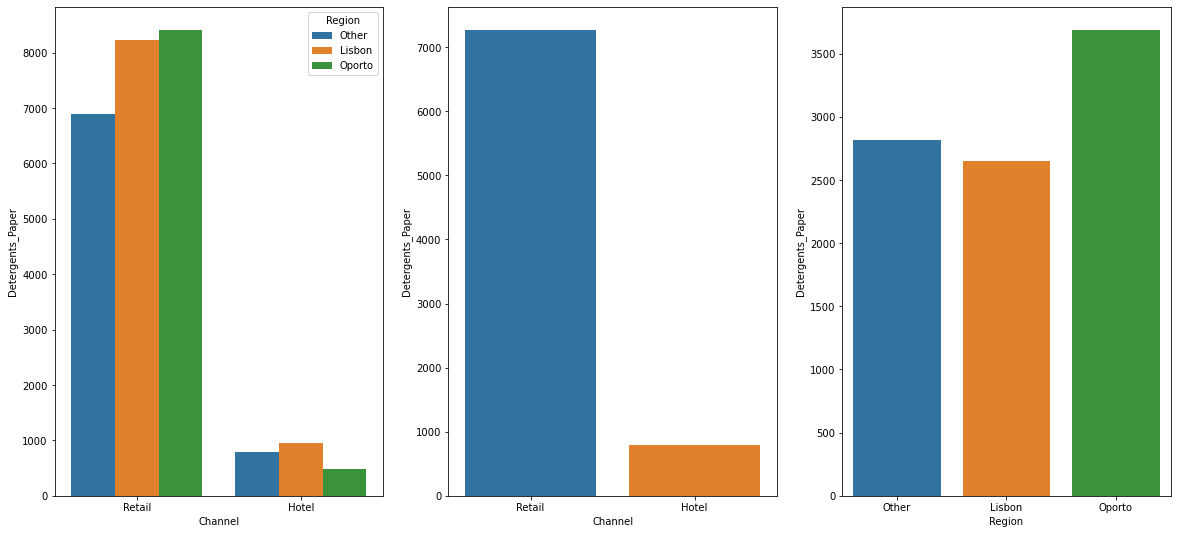

In [19]:
fig, axs = plt.subplots(1,3,figsize = (20,9))
sns.barplot(x="Channel", y="Detergents_Paper", hue ="Region", ci=None, data=wccopy,ax=axs[0] );
sns.barplot(x="Channel", y="Detergents_Paper",data=wccopy,ci=None,ax=axs[1]);
sns.barplot(x="Region", y="Detergents_Paper", ci=None, data=wccopy,ax=axs[2]);

#### Delicatessen variety

In [20]:
pd.pivot_table(wccopy,index='Region',values='Delicatessen',columns='Channel',aggfunc=sum,margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,70632,33695,104327
Oporto,30965,23541,54506
Other,320358,191752,512110
All,421955,248988,670943


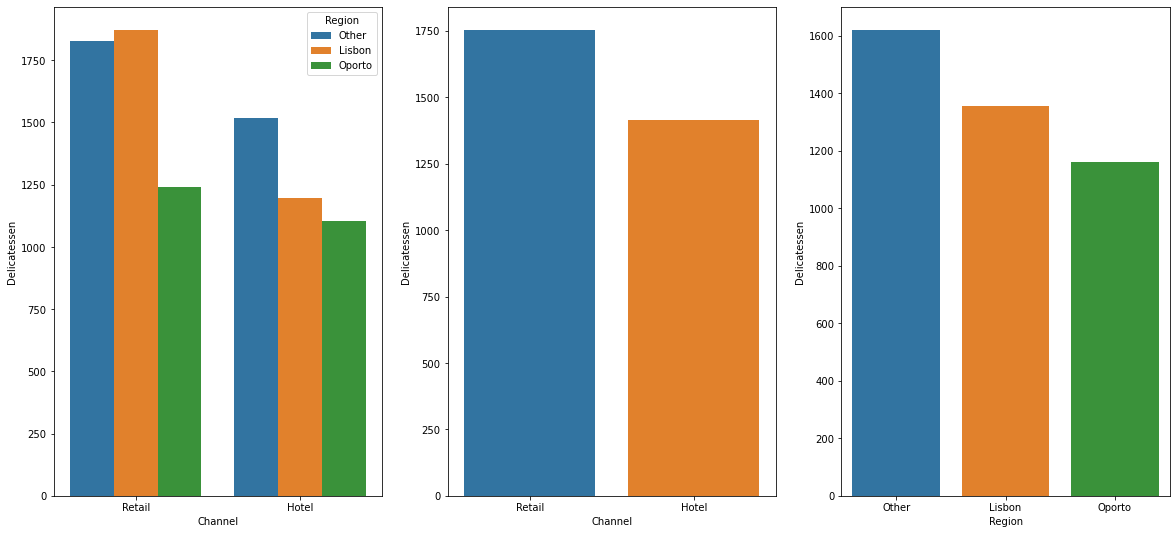

In [21]:
fig, axs = plt.subplots(1,3,figsize = (20,9))
sns.barplot(x="Channel", y="Delicatessen", hue ="Region", ci=None, data=wccopy,ax=axs[0] );
sns.barplot(x="Channel", y="Delicatessen",data=wccopy,ci=None,ax=axs[1]);
sns.barplot(x="Region", y="Delicatessen", ci=None, data=wccopy,ax=axs[2]);

##### From the above tables and graph plots we can conclude that 
- ##### Milk , Grocery ,Delicatessen & Detergents_Paper spend more in retail channels vs hotel across all regions 

- ##### Frozen and fresh spend more in hotel channels vs retail across all regions

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?  

In [22]:
products = wc[['Fresh','Milk','Frozen','Grocery','Delicatessen','Detergents_Paper']]
products.head()

,Fresh,Milk,Frozen,Grocery,Delicatessen,Detergents_Paper
0,12669,9656,214,7561,1338,2674
1,7057,9810,1762,9568,1776,3293
2,6353,8808,2405,7684,7844,3516
3,13265,1196,6404,4221,1788,507
4,22615,5410,3915,7198,5185,1777


In [23]:
 # covariance for every product
for i in products.columns:
    print('Co-efficient of variation for',i,'is',round(products[i].std()/products[i].mean(),2))

Co-efficient of variation for Fresh is 1.05
Co-efficient of variation for Milk is 1.27
Co-efficient of variation for Frozen is 1.58
Co-efficient of variation for Grocery is 1.2
Co-efficient of variation for Delicatessen is 1.85
Co-efficient of variation for Detergents_Paper is 1.65


In [24]:
stats.variation(products,axis=0)

array([1.05271961, 1.27185083, 1.57853553, 1.19381545, 1.8473041 ,
       1.65276579])

#### Inference:
- ####  Fresh item have lowest covariance ,so it is consistent
- ####  Delicatessen item have highest covariance, so it is inconsistent.

### 1.4 Are there any outliers in the data?

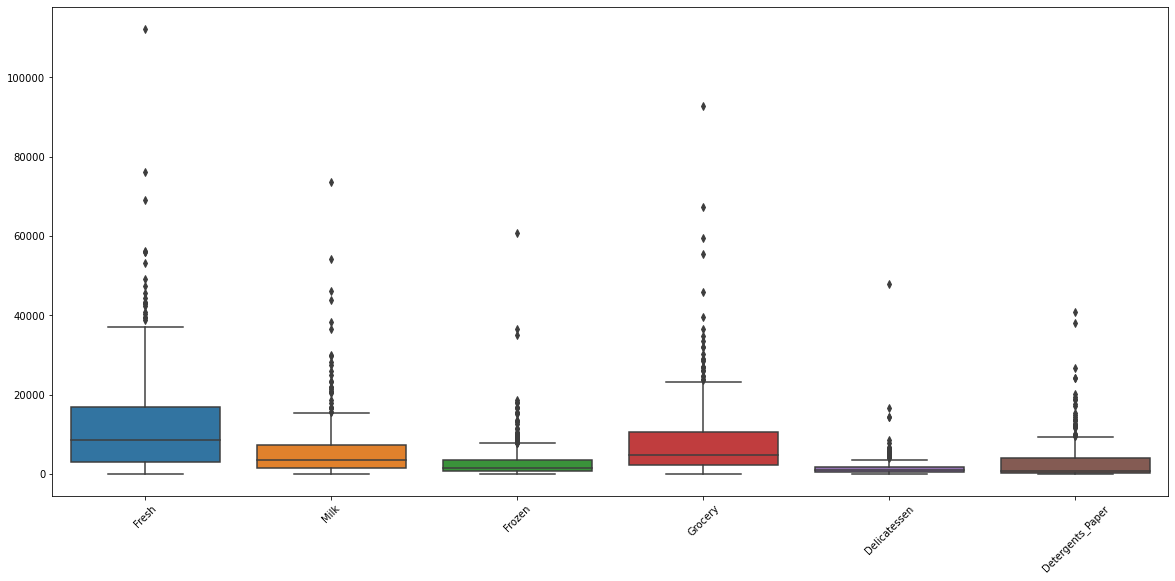

In [25]:
fig, axs = plt.subplots(figsize = (20,9))
sns.boxplot(data=products);
plt.xticks(rotation=45);

#### Inference
- #### Yes there are outliers and all the products have outliers

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

 As per the analysis, I find out that there are inconsistencies in spending of different items (by calculating Coefficient of Variation), which should be minimized. The spending of Hotel and Retail channel are different which should be more or less equal. And also spent should equal for different regions. Need to focus on other items also than “Fresh” and “Grocery”

# Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

### 2.1  For this data, construct the following contingency tables (Keep Gender as row variable)




In [26]:
csmu = pd.read_csv('Survey-1.csv')
csmu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


##### 2.1.1. Gender and Major

In [27]:
pd.crosstab(index=csmu.Gender,columns=csmu.Major,margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


##### 2.1.2. Gender and Grad Intention

In [28]:
pd.crosstab(index=csmu.Gender,columns=csmu['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


##### 2.1.3. Gender and Employment

In [29]:
pd.crosstab(index=csmu.Gender,columns=csmu.Employment,margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


##### 2.1.4. Gender and Computer

In [30]:
pd.crosstab(index=csmu.Gender,columns=csmu.Computer,margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [31]:
pd.DataFrame(csmu.Gender.value_counts())

,Gender
Female,33
Male,29


####  P( Male) = no of males/total number of students

In [32]:
print("The probability of a student picked at random being male is %.2f" % (csmu[csmu.Gender=='Male'].value_counts().sum()/csmu.Gender.count().sum()))

The probability of a student picked at random being male is 0.47


####  P( Female) = no of females/total number of students

#### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [33]:
print("The probability of a student picked at random being female is %.2f" %(csmu[csmu.Gender=='Female'].value_counts().sum()/csmu.Gender.count().sum()))

The probability of a student picked at random being female is 0.53


### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [34]:
pd.crosstab(index=csmu.Gender,columns=csmu.Major,margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [35]:
totalmalestudents = csmu[csmu.Gender=='Male'].value_counts().sum()
for i in csmu.Major.sort_values().unique():
    print("The probability a male studying",i,"is",
          round(csmu[(csmu.Major==i) & (csmu.Gender=='Male')].value_counts().sum()*100/totalmalestudents,2),"% CMSU" )

The probability a male studying Accounting is 13.79 % CMSU
The probability a male studying CIS is 3.45 % CMSU
The probability a male studying Economics/Finance is 13.79 % CMSU
The probability a male studying International Business is 6.9 % CMSU
The probability a male studying Management is 20.69 % CMSU
The probability a male studying Other is 13.79 % CMSU
The probability a male studying Retailing/Marketing is 17.24 % CMSU
The probability a male studying Undecided is 10.34 % CMSU


#### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [36]:
pd.crosstab(index=csmu.Gender,columns=csmu.Major,margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [37]:
totalfemalestudents = csmu[csmu.Gender=='Female'].value_counts().sum()
for i in csmu.Major.sort_values().unique():
    print("The probability a female studying",i,"is",
          round(csmu[(csmu.Major==i) & (csmu.Gender=='Female')].value_counts().sum()*100/totalfemalestudents,2),"% at CMSU" )

The probability a female studying Accounting is 9.09 % at CMSU
The probability a female studying CIS is 9.09 % at CMSU
The probability a female studying Economics/Finance is 21.21 % at CMSU
The probability a female studying International Business is 12.12 % at CMSU
The probability a female studying Management is 12.12 % at CMSU
The probability a female studying Other is 9.09 % at CMSU
The probability a female studying Retailing/Marketing is 27.27 % at CMSU
The probability a female studying Undecided is 0.0 % at CMSU


### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [38]:
pd.crosstab(index=csmu.Gender,columns=csmu['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


- ####  P(male and intends to graduate) = P(male/GradIntention)

In [39]:
totalstudents = csmu.value_counts().sum()
maleGradInt= csmu[(csmu.Gender=='Male')& (csmu['Grad Intention']=='Yes')].value_counts().sum()

In [40]:
print('The probabilty a random student is a male and intents to graduate is', round(maleGradInt/totalstudents,2))

The probabilty a random student is a male and intents to graduate is 0.27


#### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [41]:
pd.crosstab(index=csmu.Gender,columns=csmu.Computer,margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [42]:
femalenolaptop = csmu[(csmu.Gender=='Female')& (csmu.Computer!='Laptop')].value_counts().sum()

In [43]:
print('The probabilty a random student is a female and does not have a laptop is', round(femalenolaptop/totalstudents,2))

The probabilty a random student is a female and does not have a laptop is 0.06


### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [44]:
pd.crosstab(index=csmu.Gender, columns=csmu.Employment,margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


- ####  P(male or full-time) = P(male) + P(full-time) - P(full-time employeed male)

In [45]:
fulltime = csmu[csmu.Employment=='Full-Time'].value_counts().sum()
malefulltime = csmu[(csmu.Gender=='Male')& (csmu.Employment=='Full-Time')].value_counts().sum()

In [46]:
print('The probability of a person chosen randomly is either a male or has full-time employment is',
      round((totalmalestudents+fulltime-malefulltime)/totalstudents,2))

The probability of a person chosen randomly is either a male or has full-time employment is 0.52


#### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [47]:
pd.crosstab(index=csmu.Gender, columns=csmu.Major,margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [48]:
femaleIntBusi = csmu[(csmu.Gender=='Female')&(csmu.Major=='International Business')].value_counts().sum()
femaleMgmt =csmu[(csmu.Gender=='Female')&(csmu.Major=='Management')].value_counts().sum()

- #### P(female internation business or Management) = P(International business for female) + P(Management for female)

In [49]:
print("The probability that a given female student is chosen randomly is majoring in internation business or management is ",
     round( (femaleIntBusi + femaleMgmt)/totalfemalestudents,2))

The probability that a given female student is chosen randomly is majoring in internation business or management is  0.24


### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [50]:
GradIntension = pd.Categorical( ['Yes','No'])
pd.crosstab(index=csmu.Gender, columns=csmu['Grad Intention']).drop(['Undecided'],axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


 #### Graduate intention and being female are not independent events , they are mutually exclusive events

### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

#### Answer the following questions based on the data

#### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [51]:
pd.crosstab(index=csmu.Gender,columns=(csmu.GPA<3),colnames=['Less than 3'], margins=True)

Less than 3,False,True,All
Gender,,,
Female,25,8,33
Male,20,9,29
All,45,17,62


In [52]:
gpal3 = csmu[csmu.GPA <3].value_counts().sum()

In [53]:
print("The probability that the GPA is less than 3 is",gpal3/totalstudents)

The probability that the GPA is less than 3 is 0.27419354838709675


#### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [54]:
pd.crosstab(index=csmu.Gender,columns=csmu.Salary>=50,colnames=['Salary 50 or more'],margins=True)

Salary 50 or more,False,True,All
Gender,,,
Female,15,18,33
Male,15,14,29
All,30,32,62


In [55]:
csmuMale = csmu[csmu.Gender=='Male']
csmuFemale = csmu[csmu.Gender=='Female']

In [56]:
salarymaleGe50 = csmuMale[csmuMale.Salary>=50].value_counts().sum() 
print("The probability that a male student salary is 50 or more is",round(salarymaleGe50/totalmalestudents,2))

The probability that a male student salary is 50 or more is 0.48


In [57]:
salaryfemaleGe50 = csmuFemale[csmuFemale.Salary>=50].value_counts().sum() 
print("The probability that a female student salary is 50 or more is",round(salaryfemaleGe50/totalfemalestudents,2))

The probability that a female student salary is 50 or more is 0.55


### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

- p <= $\alpha$: reject H0, not normal.
- p > $\alpha$: fail to reject H0, normal.

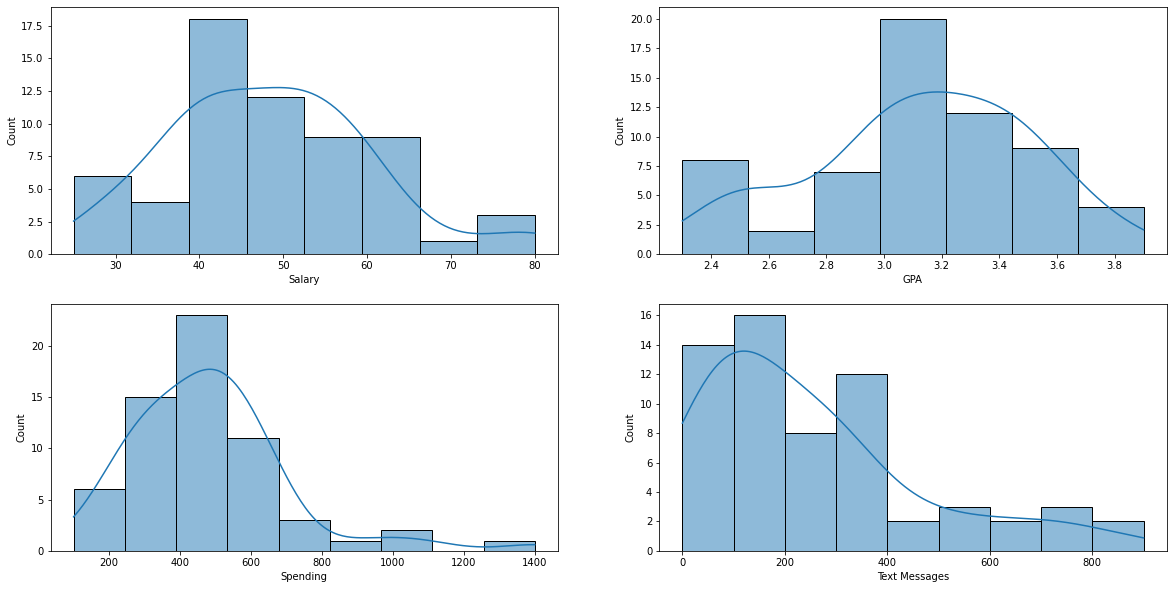

In [58]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
sns.histplot(csmu.Salary,kde=True,ax=axs[0,0]);
sns.histplot(csmu.GPA,kde=True,ax=axs[0,1]);
sns.histplot(csmu.Spending,kde=True,ax=axs[1,0]);
sns.histplot(csmu['Text Messages'],kde=True,ax=axs[1,1]);

In [59]:
shapirotestSalary = stats.shapiro(csmu.Salary)
shapirotestGpa = stats.shapiro(csmu.GPA)
shapirotestSpending = stats.shapiro(csmu.Spending)
shapirotesttextmess = stats.shapiro(csmu['Text Messages'])

In [60]:
shapirovalues ={'Salary':shapirotestSalary.pvalue ,
                'Gpa':shapirotestGpa.pvalue,
               'Spending': shapirotestSpending.pvalue,
                'Textmessage':shapirotesttextmess.pvalue}

In [61]:
alpha=0.05
for x in shapirovalues:
    if shapirovalues[x] > alpha:
        print(x,'distribution is normal')
    else: 
        print(x,'distribution is not normal')

Salary distribution is not normal
Gpa distribution is normal
Spending distribution is not normal
Textmessage distribution is not normal


#### From the above after perfomming the shapiro-wilk test ,we can tell that only GPA is normally distributed

# Problem 3 

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

#### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#### Step 1
- $H_0$ : $\mu \geq$  0.35
- $H_A$ : $\mu$ < 0.35 

#### Step 2 
$\alpha$ =0.05

#### Step 3
we know population mean , sample mean , n=36 for shingle A and n=31 for shingle B, so ttest for both

#### Step 4
calculating pvalue 

In [62]:
alpha = 0.05
shingles = pd.read_csv('A+&+B+shingles.csv')
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


#### For A shingles

In [63]:
tStatisticAshingle , pvalueAshingle = stats.ttest_1samp(shingles.A,0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(tStatisticAshingle, pvalueAshingle))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.14955266289815025 


In [64]:
def hypothesis(pvalue):
    if pvalue < alpha:
        print('We have evidence to reject the null hypothesis since p value {0} < {1} alpha'.format(round(pvalue,5),alpha))
    else: 
        print('We have no evidence to reject the null hypothesis since p value {0} > {1} alpha'.format(round(pvalue,5),alpha))

In [65]:
hypothesis(pvalueAshingle)

We have no evidence to reject the null hypothesis since p value 0.14955 > 0.05 alpha


#### Step 5: conclusion

##### Since pvalue > 0.05, do not reject $H_0$  . There is not enough evidence to conclude that the mean moisture content for Sample A shingles is less than 0.35 pounds per 100 square feet.

#### For B shingles

In [66]:
tStatisticBshingle , pvalueBshingle = stats.ttest_1samp(shingles.B,0.35,nan_policy='omit')
print('One sample t test \nt statistic: {0} p value: {1} '.format(tStatisticBshingle, pvalueBshingle))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.004180954800638365 


In [67]:
hypothesis(pvalueBshingle)

We have evidence to reject the null hypothesis since p value 0.00418 < 0.05 alpha


#### Step 5: conclusion

##### Since pvalue < 0.05, reject $H_0$ . There is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet.

#### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

### Hypothesis 

#### Step 1 : formulate hypothesis
- $H_0$ : $\mu_A$ = $\mu_B$ 
- $H_A$ : $\mu_A$ $\neq$ $\mu_B$

#### Step 2 : alpha 
$\alpha$ = 0.05 

#### Step 3 : perfoming 2 sample paired ttest 

#### Step 4 : calculate pvalue

In [68]:
tstat2 , pval2 = stats.ttest_rel(shingles.A,shingles.B,nan_policy='omit')
print('Two sample paired t test \nt statistic: {0} p value: {1} '.format(tstat2, pval2))

Two sample paired t test 
t statistic: 0.8445012483270872 p value: 0.4050738703654352 


In [69]:
hypothesis(pval2)

We have no evidence to reject the null hypothesis since p value 0.40507 > 0.05 alpha


#### Since pvalue > 0.05, do not reject  𝐻0  . So we can say that population mean for shingles A and shingles B are equal 